# This was my first attempt at an intuitive model before I realised I could do some feature engineering even in an intuitive model
Kept in for reference!

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score,cross_val_predict

import statsmodels.formula.api as smf

In [2]:
basic_data = pd.read_pickle('full_country_data.pkl')
basic_data = basic_data.drop(['Continent','homeless','marriage','divorce','marr_div_ratio','malnutrition','pov_ind','FemalesNumber','MalesNumber','bc_BothSexes'],axis=1)
basic_data = basic_data.astype(float)
X,y = basic_data.drop('BothSexes',axis=1), basic_data['BothSexes']

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=8,shuffle=True)

In [4]:
train_whole = pd.concat([y_train,X_train],axis=1)
train_whole = train_whole.drop(['hum_freedom','gen_inequality'],axis=1,errors='ignore')

In [5]:
model = smf.ols("""BothSexes ~ happy+doc_ratio+below_pov_line+gdp+gdppp+unemp+med_age+med_age_male+med_age_female+birth_sex_ratio+total_sex_ratio+literacy+econ_freedom+sunny_hours+rainfall+pop_dens+avg_temp+int_users+eth_div+ling_div+relig_div+wto+alc_cons+beer+wine+spirits+oth_alc+total_bmi+fem_bmi+male_bmi+r_home_war+elevation+guns+farmers+depression+children+urbanization+immigrants+population+homeless_dummy+marr_div_dummy+malnutrition_dummy+pov_ind_dummy"""
                     ,data=train_whole)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BothSexes   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     3.678
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           4.59e-08
Time:                        16:03:23   Log-Likelihood:                -386.59
No. Observations:                 146   AIC:                             857.2
Df Residuals:                     104   BIC:                             982.5
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             97.0961     31.428      3.089      0.003      34.772     159.420
happy                  0.3953      0.639      0.619      0.537      -0.871       1.661
doc_ratio             -0.0308      0.053     -0.584      0.561      -0.135       0.074
below_pov_line        -0.0390      0.035     -1.122      0.265      -0.108       0.030
gdp                -6.996e-07   3.21e-07     -2.178      0.032   -1.34e-06   -6.27e-08
gdppp                  0.0001    4.8e-05      2.233      0.028     1.2e-05       0.000
unemp                 -0.1260      0.066     -1.913      0.058      -0.257       0.005
med_age                3.0053      4.170      0.721      0.473      -5.264      11.275
med_age_male          -2.3842      2.164     -1.102      0.273      -6.675       1.907
med_age_female        -0.6963      2.052     -0.339      0.735      -4.765       3.372
birth_sex_ratio      -49.2099     22.396     -2.197      0.030     -93.623      -4.797
total_sex_ratio       -3.2484      3.884     -0.836      0.405     -10.951       4.455
literacy              -0.0246      0.036     -0.676      0.500      -0.097       0.048
econ_freedom          -1.1498      0.761     -1.511      0.134      -2.659       0.359
sunny_hours           -0.0019      0.001     -1.498      0.137      -0.004       0.001
rainfall              -0.0002      0.001     -0.280      0.780      -0.002       0.001
pop_dens            9.895e-05      0.000      0.373      0.710      -0.000       0.001
avg_temp              -0.1779      0.099     -1.797      0.075      -0.374       0.018
int_users             -0.1110      0.043     -2.612      0.010      -0.195      -0.027
eth_div                2.0526      2.488      0.825      0.411      -2.882       6.987
ling_div              -1.9340      2.182     -0.886      0.377      -6.261       2.393
relig_div              0.9343      2.124      0.440      0.661      -3.277       5.146
wto                   -1.3816      1.786     -0.773      0.441      -4.924       2.161
alc_cons               0.4691      0.142      3.305      0.001       0.188       0.751
beer                   0.0400      0.038      1.053      0.295      -0.035       0.115
wine                   0.0551      0.046      1.209      0.230      -0.035       0.146
spirits                0.0760      0.037      2.036      0.044       0.002       0.150
oth_alc                0.0885      0.043      2.057      0.042       0.003       0.174
total_bmi             -1.2192      8.739     -0.140      0.889     -18.549      16.110
fem_bmi                1.6314      4.418      0.369      0.713      -7.129      10.392
male_bmi              -1.0292      4.378     -0.235      0.815      -9.712       7.653
r_home_war            -1.1742      1.096     -1.071      0.287      -3.348       1.000
elevation             -0.0016      0.0

In [6]:
kf = KFold(10,shuffle=True,random_state=13)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [8]:
lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
def model_competition(feature_matrix,target_series,l_alpha,r_alpha):
    ols = LinearRegression()
    lasso = Lasso(alpha = l_alpha)
    ridge = Ridge(alpha = r_alpha)
    models = {ols:'OLS',lasso:'lasso',ridge:'ridge'}
    for model in models.keys() :
        if model == ols :
            r2 = cross_val_score(model, feature_matrix, target_series,cv=kf, scoring='r2')
            print(f'The mean r2 for {models[model]} is {np.mean(r2)} +- {np.std(r2)}.')
        else :
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(feature_matrix)
            r2 = cross_val_score(model, X_scaled, target_series,cv=kf, scoring='r2')
            print(f'The mean r2 for {models[model]} is {np.mean(r2)} +- {np.std(r2)}.')

In [10]:
model_competition(X_train,y_train,best_alpha_l,best_alpha_r)

The mean r2 for OLS is -0.29496934416429166 +- 0.6716822568781581.
The mean r2 for lasso is 0.10276418312389879 +- 0.2926263702841764.
The mean r2 for ridge is -0.04628068960102866 +- 0.37669539378290956.


# That's... low
Let's see what lasso tells us to cut.

In [11]:
lasso = Lasso()
results = lasso.fit(X_train,y_train)
print(f'Lasso test R^2: {lasso.score(X_train,y_train)}')

list(zip(X_train.columns,results.coef_))


Lasso test R^2: 0.4713674801754536


[('happy', -0.0),
 ('doc_ratio', -0.0),
 ('below_pov_line', -0.023697450543618843),
 ('gdp', -1.3215082738201912e-07),
 ('gdppp', 3.3303387919846266e-05),
 ('unemp', -0.05653983817086052),
 ('med_age', -0.0),
 ('med_age_male', -0.03446985485726758),
 ('med_age_female', -0.0),
 ('birth_sex_ratio', -0.0),
 ('total_sex_ratio', -0.0),
 ('literacy', -0.012249561044460778),
 ('hum_freedom', -0.0),
 ('econ_freedom', -0.0),
 ('gen_inequality', 0.0),
 ('sunny_hours', -0.0019017283653611583),
 ('rainfall', 4.915037525470209e-05),
 ('pop_dens', 3.755171238124834e-05),
 ('avg_temp', -0.12786722675389553),
 ('int_users', -0.10254536254060401),
 ('eth_div', 0.0),
 ('ling_div', 0.0),
 ('relig_div', 0.0),
 ('wto', -0.0),
 ('alc_cons', 0.4648838582641902),
 ('beer', 0.001992295410762588),
 ('wine', 0.0),
 ('spirits', 0.02698842955562818),
 ('oth_alc', 0.04829386219533034),
 ('total_bmi', -0.0),
 ('fem_bmi', -0.0),
 ('male_bmi', -0.0),
 ('r_home_war', -0.0),
 ('elevation', -0.0021704508838274396),
 ('gu

Uhhhhh... okay. Let's take that one by one.

In [12]:
X_train_dropping = X_train.drop([
    'happy',
    'below_pov_line',
    'unemp',
    'med_age_male',
    'med_age_female',
    'med_age',
    'birth_sex_ratio',
    'total_sex_ratio',
    'gen_inequality',
    'hum_freedom',
    'econ_freedom',
    'gen_inequality',
    'eth_div',
    'ling_div',
    'relig_div',
    'wto',
    'total_bmi',
    'fem_bmi',
    'male_bmi',
    'r_home_war',
    'children',
    'homeless_dummy',
    'marr_div_dummy',
    'malnutrition_dummy',
    'pov_ind_dummy'],axis=1)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dropping)

In [14]:
lasso = LassoCV(cv = kf)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_d = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r_d = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
model_competition(X_train_dropping,y_train,best_alpha_l_d,best_alpha_r_d)

The mean r2 for OLS is -0.16545538939935822 +- 0.7804026732583528.
The mean r2 for lasso is 0.06902552619098645 +- 0.33323706949442083.
The mean r2 for ridge is -0.008748194319599912 +- 0.4377604502261016.


### Cool.
The $R^2$ values increased. Let's try dropping a few more things that lasso suggests, just in case - it's the only thing we really can do, given that we are going for interpretability.

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dropping)

In [17]:
lasso = Lasso(alpha=1.5)
results = lasso.fit(X_train_dropping,y_train)
print(f'Lasso test R^2: {lasso.score(X_train_dropping,y_train)}')

list(zip(X_train_dropping.columns,results.coef_))

Lasso test R^2: 0.44683238322039887


[('doc_ratio', -0.0),
 ('gdp', -3.0191430423962364e-08),
 ('gdppp', 3.273587856818958e-05),
 ('literacy', -0.009929728993544296),
 ('sunny_hours', -0.002070760481001663),
 ('rainfall', 7.458721458598529e-05),
 ('pop_dens', 1.535147232822641e-05),
 ('avg_temp', -0.12317021716805006),
 ('int_users', -0.0895665632713649),
 ('alc_cons', 0.3994617936629931),
 ('beer', 0.0),
 ('wine', 0.0),
 ('spirits', 0.025501733869841756),
 ('oth_alc', 0.046951325824969664),
 ('elevation', -0.0021695847398012723),
 ('guns', 0.028639397800589043),
 ('farmers', 0.00928745764075327),
 ('depression', -0.0034374949416074697),
 ('urbanization', 0.029355160928862627),
 ('immigrants', -0.0365598654555041),
 ('population', 2.2275010805539255e-09)]

In [18]:
X_train_dropping_2 = X_train_dropping.drop('guns',axis=1)

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dropping_2) 

lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_d2 = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r_d2 = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
model_competition(X_train_dropping,y_train,best_alpha_l_d2,best_alpha_r_d2)

The mean r2 for OLS is -0.16545538939935822 +- 0.7804026732583528.
The mean r2 for lasso is 0.06850208214773178 +- 0.33260505610316576.
The mean r2 for ridge is -0.008748194319599912 +- 0.4377604502261016.


### This decreased lasso and didn't affect the other models.
So lasso is our best model right now. But if we try it on test...

In [21]:
X_test_dropping = X_test.drop(['happy',
    'below_pov_line',
    'unemp',
    'med_age_male',
    'med_age_female',
    'med_age',
    'birth_sex_ratio',
    'total_sex_ratio',
    'gen_inequality',
    'hum_freedom',
    'econ_freedom',
    'gen_inequality',
    'eth_div',
    'ling_div',
    'relig_div',
    'wto',
    'total_bmi',
    'fem_bmi',
    'male_bmi',
    'r_home_war',
    'children',
    'homeless_dummy',
    'marr_div_dummy',
    'malnutrition_dummy',
    'pov_ind_dummy'],axis=1)

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dropping)
X_test_d_scaled = scaler.transform(X_test_dropping)


lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_d = lass_results.alpha_

In [23]:
lasso = Lasso(alpha=best_alpha_l_d)
results = lasso.fit(X_train_dropping,y_train)
print(f'Lasso Regression test R^2: {lasso.score(X_test_d_scaled,y_test)}')

Lasso Regression test R^2: -0.8430029599791432


# Big oof.
What went wrong? Too few samples! Ridge and lasso don't work well if you have too little data. I guess that means we have to rely on naïve OLS, which was not affected by dropping the last thing. Let's try dropping more, just in case.

In [24]:
lasso = Lasso(alpha=1.633)
results = lasso.fit(X_train_dropping_2,y_train)
print(f'Lasso test R^2: {lasso.score(X_train_dropping_2,y_train)}')

list(zip(X_train_dropping.columns,results.coef_))

Lasso test R^2: 0.43891873914220547


[('doc_ratio', -0.0),
 ('gdp', 1.0067694212548675e-07),
 ('gdppp', 3.178096681117872e-05),
 ('literacy', -0.009526253650934438),
 ('sunny_hours', -0.0020640506033200376),
 ('rainfall', 2.0674414888528845e-05),
 ('pop_dens', -8.477482010407081e-06),
 ('avg_temp', -0.12715269078284874),
 ('int_users', -0.08814110584709349),
 ('alc_cons', 0.38543857984703983),
 ('beer', -0.0),
 ('wine', 0.0),
 ('spirits', 0.021852500740403923),
 ('oth_alc', 0.045005838499536995),
 ('elevation', -0.002188243253028916),
 ('guns', 0.008351335731598594),
 ('farmers', -0.002942527354208736),
 ('depression', 0.028849414914768463),
 ('urbanization', -0.03177692867783328),
 ('immigrants', 1.4864617020570176e-09)]

In [25]:
X_train_keep_dropping = X_train_dropping_2.drop(['doc_ratio'],axis=1)

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_keep_dropping) 

lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_kd = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r_kd = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
model_competition(X_train_keep_dropping,y_train,best_alpha_l_d2,best_alpha_r_d2)

The mean r2 for OLS is -0.15638606908866298 +- 0.7968171255447922.
The mean r2 for lasso is 0.07306694007053102 +- 0.33239168376328815.
The mean r2 for ridge is 0.006783466109392644 +- 0.4236766325935556.


# That didn't work.
Let's try dropping at random instead, see if that improves things; there's a lot of colinearity in here.

In [28]:
X_train_keep_dropping = X_train_dropping_2.drop(['pop_dens','gdp','rainfall',
                                                 'farmers','depression','urbanization','immigrants'],axis=1)

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_keep_dropping) 

lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_kd = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r_kd = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
model_competition(X_train_keep_dropping,y_train,best_alpha_l_d2,best_alpha_r_d2)

The mean r2 for OLS is 0.10142769934351789 +- 0.3002853384905849.
The mean r2 for lasso is 0.12159003546700609 +- 0.31193264669486.
The mean r2 for ridge is 0.11075033515810284 +- 0.3166274643599967.


In [31]:
'+'.join(list(X_train_keep_dropping.columns))

'doc_ratio+gdppp+literacy+sunny_hours+avg_temp+int_users+alc_cons+beer+wine+spirits+oth_alc+elevation+population'

# Having maximised our $R^2$...

Let's work on p-values. Significance value of ~.1 let's say.

In [32]:
model = smf.ols("""BothSexes ~ gdppp+avg_temp+int_users+alc_cons+oth_alc+elevation"""
                     ,data=train_whole)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BothSexes   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     15.94
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           6.83e-14
Time:                        10:58:57   Log-Likelihood:                -413.78
No. Observations:                 146   AIC:                             841.6
Df Residuals:                     139   BIC:                             862.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8920      2.323      6.840      0.000      11.298      20.486
gdppp       4.533e-05   2.53e-05      1.792      0.075   -4.68e-06    9.53e-05
avg_temp      -0.1925      0.061     -3.139      0.002      -0.314      -0.071
int_users     -0.1168      0.023     -4.979      0.000      -0.163      -0.070
alc_cons       0.5972      0.113      5.303      0.000       0.375       0.820
oth_alc        0.0372      0.015      2.419      0.017       0.007       0.068
elevation     -0.0026      0.001     -3.004      0.003      -0.004      -0.001
==============================================================================
Omnibus:                       33.955   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.956
Skew:                           1.065   Prob(JB):                     2.13e-14
Kurtosis:                       5.411   Cond. No.                     2.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_train_keep_dropping=X_train_keep_dropping.drop(['doc_ratio',
    'literacy',
    'sunny_hours',
    'beer',
    'wine',
    'spirits',
    'population'],axis=1)

### This lowered our $R^2$ for OLS
So let's run with it, despite that honestly terrible standard deviation of $R^2$.

In [51]:
X_train_drop = X_train.drop(['happy',
    'below_pov_line',
    'unemp',
    'med_age_male',
    'med_age_female',
    'med_age',
    'birth_sex_ratio',
    'total_sex_ratio',
    'gen_inequality',
    'hum_freedom',
    'econ_freedom',
    'gen_inequality',
    'eth_div',
    'ling_div',
    'relig_div',
    'wto',
    'total_bmi',
    'fem_bmi',
    'male_bmi',
    'r_home_war',
    'children',
    'homeless_dummy',
    'marr_div_dummy',
    'malnutrition_dummy',
    'pov_ind_dummy',
    'guns',
    'pop_dens',
    'gdp',
    'rainfall',
    'farmers',
    'depression',
    'urbanization',
    'immigrants',
    'doc_ratio',
    'literacy',
    'sunny_hours',
    'beer',
    'wine',
    'spirits',
    'population'],axis=1)

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_drop)
lasso = LassoCV(alphas=10**np.linspace(-10,10,1001),cv=kf)
results = lasso.fit(X_scaled,y_train)
list(zip(X_train_drop.columns,abs(results.coef_)/np.sum(list(abs(results.coef_)))))

[('gdppp', 0.09549199701780868),
 ('avg_temp', 0.15208442240634581),
 ('int_users', 0.3114916783050664),
 ('alc_cons', 0.23609962741325521),
 ('oth_alc', 0.08697431420287682),
 ('elevation', 0.11785796065464708)]

In [34]:
X_test_drop = X_test.drop(['happy',
    'below_pov_line',
    'unemp',
    'med_age_male',
    'med_age_female',
    'med_age',
    'birth_sex_ratio',
    'total_sex_ratio',
    'gen_inequality',
    'hum_freedom',
    'econ_freedom',
    'gen_inequality',
    'eth_div',
    'ling_div',
    'relig_div',
    'wto',
    'total_bmi',
    'fem_bmi',
    'male_bmi',
    'r_home_war',
    'children',
    'homeless_dummy',
    'marr_div_dummy',
    'malnutrition_dummy',
    'pov_ind_dummy',
    'guns',
    'pop_dens',
    'gdp',
    'rainfall',
    'farmers',
    'depression',
    'urbanization',
    'immigrants',
    'doc_ratio',
    'literacy',
    'sunny_hours',
    'beer',
    'wine',
    'spirits',
    'population'],axis=1)

In [35]:
lm_ols = LinearRegression()
results = lm_ols.fit(X_train_keep_dropping,y_train)

print(f'OLS test R^2: {lm_ols.score(X_test_drop,y_test)}.')

OLS test R^2: 0.12011482324743383.


In [47]:
list(zip(X_test_drop.columns,lm_ols.coef_))

[('gdppp', 4.533136622361662e-05),
 ('avg_temp', -0.19254746575085874),
 ('int_users', -0.11676580324729963),
 ('alc_cons', 0.59718348557133),
 ('oth_alc', 0.037210957209002624),
 ('elevation', -0.0026300929574751266)]

In [37]:
predict = lm_ols.predict(X_test_drop)

In [38]:
(np.sum((y_test-predict)**2))

1215.922362412943

In [39]:
np.mean((y_test-predict))

0.052349649584270186

In [40]:
np.max(abs(y_test-predict))

19.291852160166027

In [41]:
np.min(abs(y_test-predict))

0.28240119137556974

In [42]:
np.std(abs(y_test-predict))

3.9350860054987615

In [43]:
np.median(abs(y_test-predict))

3.121155368844933

# This is an okay model.
While it may be more interpretable, it is worse at predicting by half.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

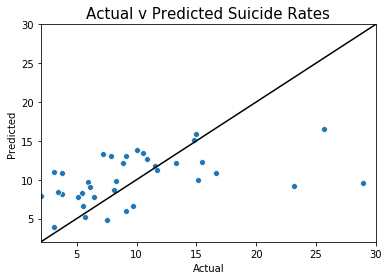

In [45]:
sns.scatterplot(y_test,predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v Predicted Suicide Rates',fontdict = {'size':15})
plt.xlim(2,30)
plt.ylim(2,30)
plt.plot([2,30],[2,30],color='k')

(array([ 4., 11.,  9.,  4.,  4.,  1.,  2.,  0.,  1.,  1.]),
 array([-7.90729799, -5.18738297, -2.46746796,  0.25244706,  2.97236207,
         5.69227709,  8.4121921 , 11.13210712, 13.85202213, 16.57193715,
        19.29185216]),
 <a list of 10 Patch objects>)

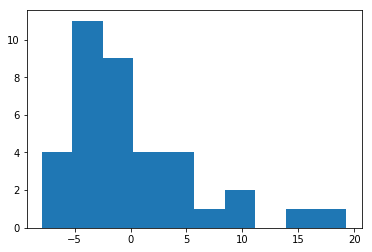

In [46]:
plt.hist(y_test-predict)